In [3]:
pip install pandas numpy seaborn matplotlib

You should consider upgrading via the '/Users/logambigaikuppusamy/Documents/DataScience/Financeanalyst/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


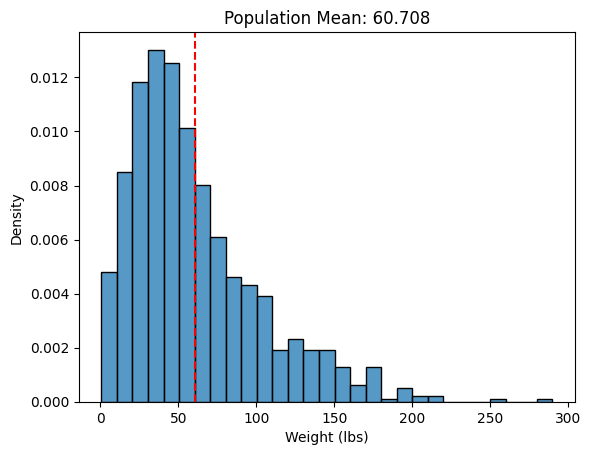

53.424271645951556


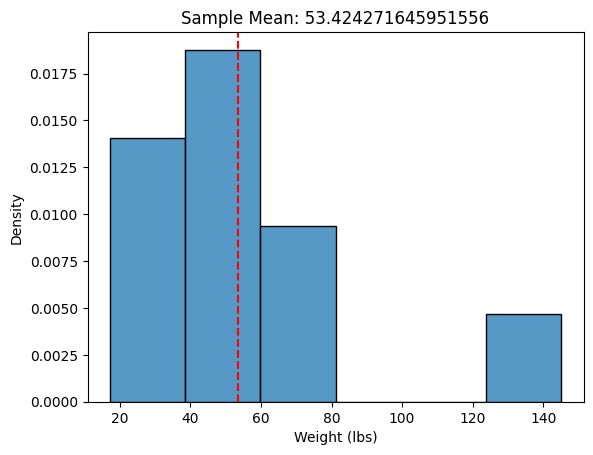

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

population = pd.read_csv("salmon_population.csv")
population = np.array(population.Salmon_Weight)
pop_mean = round(np.mean(population),3)

## Plotting the Population Distribution
sns.histplot(population, stat='density')
plt.axvline(pop_mean,color='r',linestyle='dashed')
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("Weight (lbs)")
plt.show()
plt.clf() # close this plot

samp_size = 10
# Generate our random sample below
sample = np.random.choice(np.array(population), samp_size, replace = False)

### Define sample mean below
sample_mean = np.mean(sample)
print(sample_mean)
### Uncomment the lines below to plot the sample data:
sns.histplot(sample, stat='density')
plt.axvline(sample_mean,color='r',linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

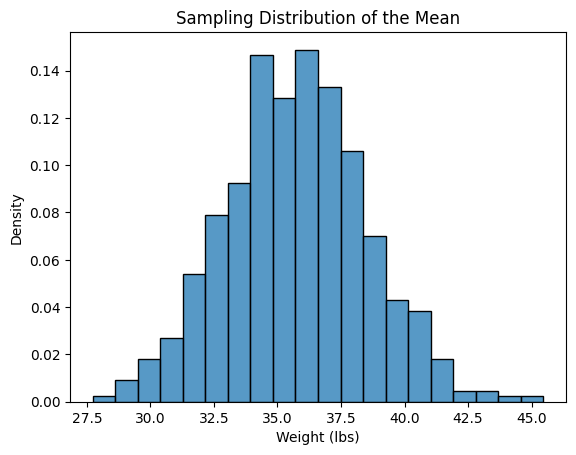

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

population = pd.read_csv("cod_population.csv")
# Save transaction times to a separate numpy array
population = population['Cod_Weight']

sample_size = 50
sample_means = []

for i in range(500):
  samp = np.random.choice(population, sample_size, replace = False)
  # calculate mean here
  # append here
  sample_means.append(np.mean(samp))

sns.histplot(sample_means,stat='density')
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

# Central Limit Theorem 
The Central Limit Theorem says that when you take a large enough number of samples from any population (even if the population is not normally distributed), the sampling distribution of the sample mean will be approximately normal (bell-shaped).
So far, we’ve defined the term sampling distribution and shown how we can simulate an approximated sampling distribution for a few different statistics (mean, maximum, variance, etc.). The Central Limit Theorem (CLT) allows us to specifically describe the sampling distribution of the mean.

The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. Using a sample size of n > 30 is usually a good rule of thumb, regardless of what the distribution of the population is like. If the distribution of the population is normal, the sample size can be smaller than that.

Let’s take another look at the salmon weight to see how the CLT applies here. The first plot below shows the population distribution. The salmon weight is skewed right, meaning the tail of the distribution is longer on the right than on the left.
Next, we’ve simulated a sampling distribution of the mean (using a sample size of 100) and super-imposed a normal distributionon top of it. Note how the estimated sampling distribution follows the normal curve almost perfectly.
Note that the CLT only applies to the sampling distribution of the mean and not other statistics like maximum, minimum, and variance!

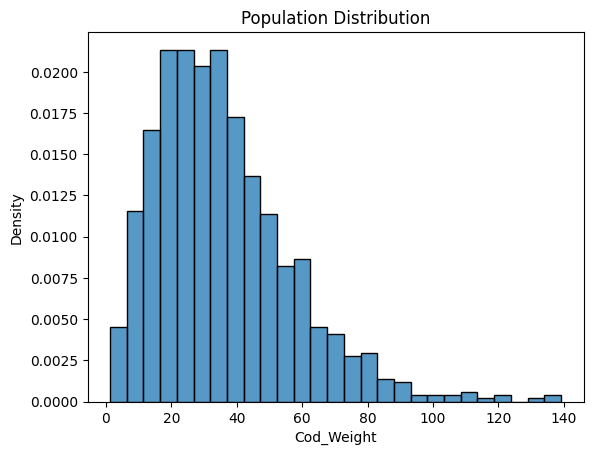

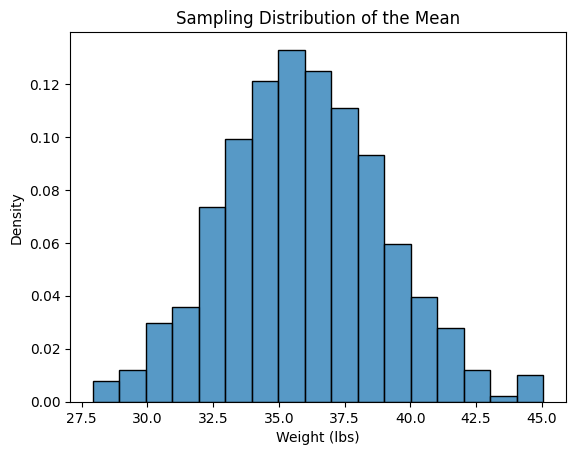

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

cod_population = pd.read_csv("cod_population.csv")
# Save transaction times to a separate numpy array
population = cod_population['Cod_Weight']

## Checkpoint 1:
sns.histplot(population, stat = 'density' )
plt.title("Population Distribution")
plt.show()

sample_means = []

# Below is our sample size
samp_size = 50

for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

## Checkpoint 2
plt.clf() # this closes the previous plot
sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

#CLT Continued
Now that we’ve examined the CLT from a high level, let’s get into the details.

The CLT not only establishes that the sampling distribution will be normally distributed, but it also allows us to describe that normal distribution quantitatively. Normal distributions are described by their mean μ (mu) and standard deviation σ (sigma).

Let’s break this up:

We take samples of size n from a population (that has a true population mean μ and standard deviation of σ) and calculate the sample mean x.
Given that n is sufficiently large (n > 30), the sampling distribution of the means will be normally distributed with:
mean x approximately equal to the population mean μ
standard deviation equal to the population standard deviation divided by the square root of the sample size. We can write this out as:
Sampling Distribution St.Dev= σ/sq.root(n)
 
We’ll focus on the first point in this exercise and the second point in the next exercise.

As an example of this, let’s look again at our salmon fish population. Last exercise, we saw that the sampling distribution of the mean was normally distributed. In the plot below, we can see that the mean of the simulated sampling distribution is approximately equal to the population mean.

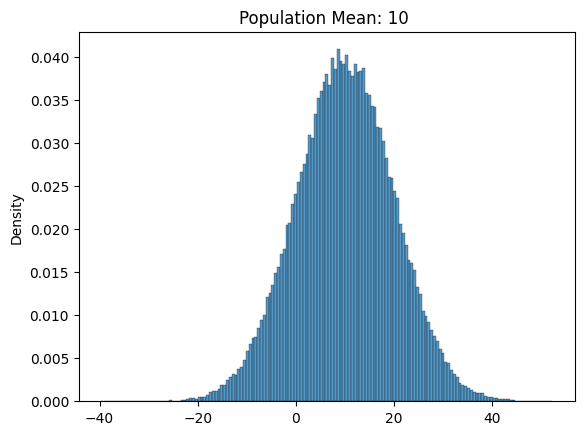

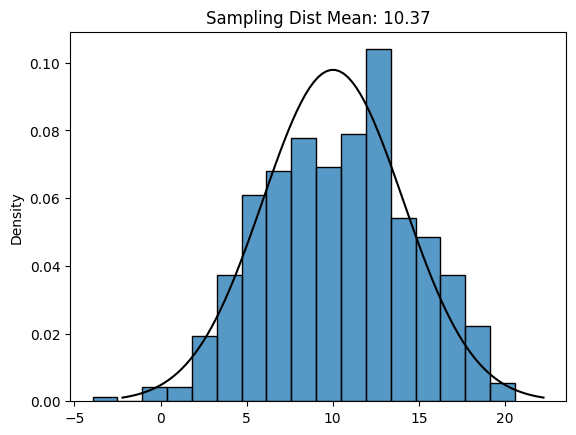

In [13]:
# Set variable samp_size equal to 6 and run the code.
# Why do you think the CLT applies here, even with a smaller sample size?
# Because the original population is normally distributed, the CLT applies even with a smaller sample size.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set the population mean & standard deviation:
population_mean = 10
population_std_dev = 10
# Set the sample size:
samp_size = 6

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

# Simulate the samples and calculate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)

# Plot the original population
sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()
plt.clf()

## Plot the sampling distribution
sns.histplot(sample_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()

# Standard Error
The second part of the Central Limit Theorem is:

The sampling distribution of the mean is normally distributed, with standard deviation equal to the population standard deviation (often denoted as the greek letter, sigma) divided by the square root of the sample size (often denoted as n):

### σ/sq.root(n)

The standard deviation of a sampling distribution is also known as the standard error of the estimate of the mean. In many instances, we cannot know the population standard deviation, so we estimate the standard error using the sample standard deviation:

### standard deviation of our sample/sq.root(sample size)
 
Two important things to note about this formula is that:

As sample size increases, the standard error will decrease.
As the population standard deviation increases, so will the standard error.

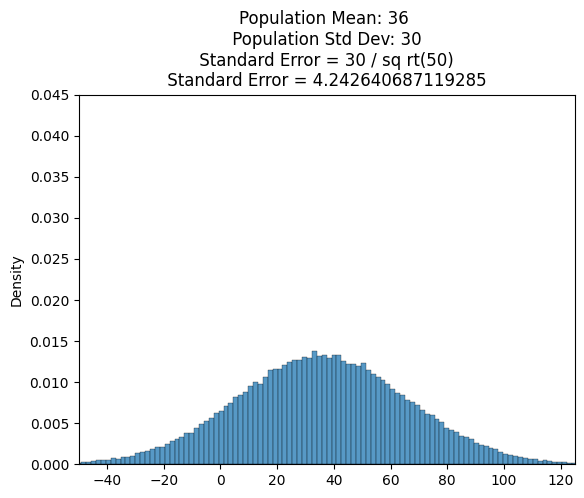

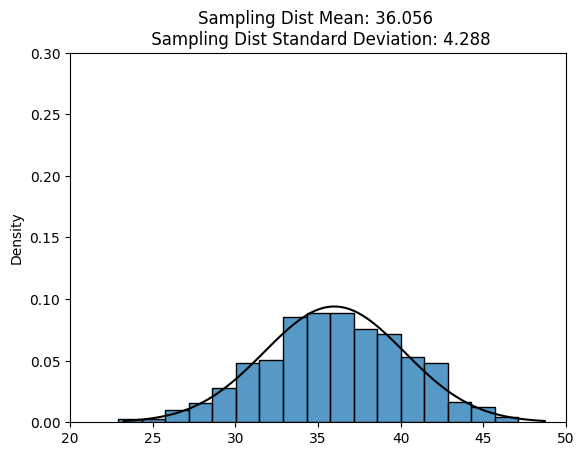

In [15]:
# Play around with the two variables samp_size and population_std_dev some more.

# Keep in mind that:

# As sample size increases, the standard error will decrease.
# As the population standard deviation increases, so will the standard error.

# Now increase the standard deviation of the population to 30.

# This means that the population distribution will have more variation (and will therefore appear wider and flatter). The sampling distribution will also become wider and flatter because the standard error will increase (due to the larger numerator).
# In the workspace, you can see a population distribution and a sampling distribution (scroll down to see the sampling distribution). Right now, the sample size is set to 10.

# Increase the sample size to 50 and note the change in the shape of the sampling distribution.

# A smaller standard error means that the distribution will be taller & skinnier. Is that the case
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

population_mean = 36
population_std_dev = 30
# Set the sample size:
samp_size = 50

### Below is code to create simulated dataset and calculate Standard Error

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

## Simulate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} \n Population Std Dev: {population_std_dev} \n Standard Error = {population_std_dev} / sq rt({samp_size}) \n Standard Error = {std_error} ")
plt.xlim(-50,125)
plt.ylim(0,0.045)
plt.show()
plt.clf()

## Plot the sampling distribution
sns.histplot(sample_means, stat = 'density')
# calculate the mean and SE for the probability distribution
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)

# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
# plt.axvline(mean_sampling_distribution,color='r',linestyle='dashed')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution} \n Sampling Dist Standard Deviation: {std_sampling_distribution}")
plt.xlim(20,50)
plt.ylim(0,0.3)
plt.show()


# Biased Estimators
According to the Central Limit Theorem, the mean of the sampling distribution of the mean is equal to the population mean. This is the case for some, but not all, sampling distributions. Remember, you can have a sampling distribution for any sample statistic, including:

mean
median
max / min
variance

Because the mean of the sampling distribution of the mean is equal to the mean of the population, we call it an unbiased estimator. A statistic is called an unbiased estimator of a population parameter if the mean of the sampling distribution of the statistic is equal to the value of the statistic for the population.

The maximum is one example of a biased estimator, meaning that the mean of the sampling distribution of the maximum is not centered at the population maximum.

In [ ]:
# Biased estimator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

app_stat_text = "Mean"
def app_statistic(x):
    # return np.max(x)
    return np.mean(x)

### Below calculates the statistic for this population:
### You don't need to change anything below to pass the checkpoints
mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")
plt.show()
plt.clf()

sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")
plt.show()
plt.clf()

# Calculating Probabilities

Once we know the sampling distribution of the mean, we can also use it to estimate the probability of observing a particular range of sample means, given some information (either known or assumed) about the population. To do this, we can use the Cumulative Distribution Function, or (CDF) of the normal distribution.

Let’s work through this with our salmon fish example. Let’s say we are transporting the salmon and want to make sure the crate we carry the fish in will be strong enough to hold the weight.

Suppose we estimate that the salmon population has an average weight of 60 lbs with a standard deviation of 40 lbs.
We have a crate that supports 750 lbs, and we want to be able to transport 10 fish at a time.
We want to calculate the probability that the average weight of those 10 fish is less than or equal to 75 (750/10).
Using the CLT, we first estimate that the mean weight of 10 randomly sampled salmon from this population is normally distributed with mean = 60 and standard error = 40/10^.5. Then, we can use this probability distribution to calculate the probability that 10 randomly sampled fish will have a mean weight less than or equal to 75.

```
x = 75
mean = 60
std_dev = 40
samp_size = 10
standard_error = std_dev / (samp_size**.5)
# remember that **.5 is raising to the power of one half, or taking the square root

stats.norm.cdf(x,mean,standard_error)
```

This returns 0.882, or a probability of 88.2% that the average weight of our sample of 10 fish will be less than or equal to 75.



In [16]:
# Given the probability you calculated in the last checkpoint, would you recommend trying to carry 25 cod in the crate?

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Setting up our parameters
std_dev = 20
samp_size = 25

standard_error = std_dev / (samp_size**.5)
print(standard_error)

x = 750/25
mean = 36

cod_cdf = stats.norm.cdf(x,mean,standard_error)

4.0


In [2]:
pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
You should consider upgrading via the '/Users/logambigaikuppusamy/Documents/DataScience/Financeanalyst/venv/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

sample_means = []

for i in range(10000):
    samp = random.sample(population, 150)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.vlines(np.mean(sample_means), 0, 1000, lw=3, linestyles='dashed')

NameError: name 'population' is not defined